# Phase 1 Project 

### Project Overview
For this project, I am required to use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.


# **1. Business Understanding**

## **Business Context**
The company is establishing a new **aviation division** focused on expanding operations through the purchase and management of aircraft. As part of this initiative, leadership seeks to ensure that investment and operational decisions are guided by **evidence-based safety insights** derived from historical data on aircraft accidents and fatalities.

## **Business Problem**
Aircraft procurement and operational planning carry significant financial and safety risks. Without data-driven insights, decisions about which aircraft types, models, or flight purposes to invest in may expose the company to **avoidable operational hazards**, higher insurance costs, or reputational damage resulting from safety incidents.

The primary business challenge is to **identify which aircraft types, makes, and operational categories have historically demonstrated lower accident and fatality risks**, so that purchasing and operational policies can be optimized for safety, cost efficiency, and long-term sustainability.

## **Business Objectives**
The main objectives of this analysis are to:
1. Assess historical aviation accident patterns across aircraft makes, models, and purposes of flight.  
2. Identify high-risk versus low-risk aircraft types and flight purposes based on recorded fatalities and incident severity.  
3. Provide actionable insights that inform aircraft procurement, operational planning, and safety management policies.  
4. Develop a foundation for future **risk-based decision-making**, where accident rates are normalized against exposure data (e.g., flight hours or fleet size).

## **Key Business Questions**
- Which aircraft makes and models have historically recorded the **fewest fatal incidents**?  
- How does **purpose of flight** (e.g., personal, instructional, commercial, aerial application) influence accident severity?  
- What are the **historical trends** in accident frequency and fatality rates, and what do they imply about safety improvements or degradation over time?  
- Based on this analysis, what **purchase and operational priorities** should guide the aviation division’s strategy?

# **2. Data Understanding**

## **Dataset Overview**
The dataset, titled **"Airline Accidents"**, contains historical records of aircraft accidents, including details such as the date, location, operator, aircraft type, purpose of flight, total fatalities, and onboard fatalities. The data spans multiple decades and provides valuable insights into aviation safety patterns across different aircraft and flight types.

This dataset will be used to explore trends in aviation accidents and identify factors associated with higher or lower accident severity, with the goal of improving safety-focused business decisions.

## **Data Source**
The dataset was obtained from a publicly available repository containing **historical aircraft accident records**.  
Each record represents a single aviation incident and includes both numerical and categorical data points relevant to understanding the event.

The data includes the following key fields:
- **Date** – The date the accident occurred.  
- **Location** – The geographical location of the accident.  
- **Operator** – The airline or operator of the aircraft involved.  
- **Aircraft Type** – The make or model of the aircraft.  
- **Purpose of Flight** – The intended operation (e.g., personal, instructional, commercial, or military).  
- **Aboard** – Total number of people aboard the aircraft.  
- **Fatalities** – Number of fatalities from the accident.  
- **Ground** – Number of fatalities on the ground (if any).  
- **Summary** – Brief narrative description of the incident.

### 2.1 Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.2 Load Dataset

In [16]:
df = pd.read_csv('C:\\Users\\geoff\\OneDrive\\Desktop\\final_project_phase_1\\final_Airline_Accidents_Phase1_Project\\data\\airline_accidents.csv')  # Read the CSV file into a DataFrame named df
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,...,Instructional,,,,,2,VMC,LANDING,02/28/2008,
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,...,Unknown,,,,,1,,,02/06/2008,
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,Personal,,,,,1,VMC,TAKEOFF,02/28/2008,
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,Personal,,1,,,,VMC,MANEUVERING,06/20/2014,
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,,,...,Other Work Use,,3,0,0,0,VMC,MANEUVERING,01/15/2009,


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150959 entries, 0 to 150958
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Event Id                 150959 non-null  object
 1   Investigation Type       150959 non-null  object
 2   Accident Number          150959 non-null  object
 3   Event Date               150959 non-null  object
 4   Location                 150959 non-null  object
 5   Country                  150959 non-null  object
 6   Latitude                 150959 non-null  object
 7   Longitude                150959 non-null  object
 8   Airport Code             150959 non-null  object
 9   Airport Name             150959 non-null  object
 10  Injury Severity          150959 non-null  object
 11  Aircraft Damage          150959 non-null  object
 12  Aircraft Category        150959 non-null  object
 13  Registration Number      150959 non-null  object
 14  Make                

### The dataset has:
- **Rows:**   150,959
- **Columns:** 31

In [18]:
df.describe()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30
count,150959,150959,150959,150959,150959,150959,150959,150959,150959,150959,...,150959,150959,150959,150959,150959,150959,150959,150959,150959,150959
unique,150047,3,143310,16138,33888,168,8868,9268,7881,18236,...,23,2317,111,37,58,344,4,13,2418,1
top,20001214X45071,,Unknown,07/10/1966,"ANCHORAGE, AK",United States,,,,,...,,,0,0,0,0,,,,
freq,3,87046,6031,41,828,147351,138985,138995,116096,113581,...,88765,147848,57941,76874,74262,53398,87554,89235,99786,150959


## 2.3 Check missing values

### 2.3.1 Handle Whitespace-Only Entries

In [19]:
df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
df

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,...,Instructional,NaN,NaN,NaN,NaN,2,VMC,LANDING,02/28/2008,NaN
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,NaN,NaN,...,Unknown,NaN,NaN,NaN,NaN,1,NaN,NaN,02/06/2008,NaN
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,Personal,NaN,NaN,NaN,NaN,1,VMC,TAKEOFF,02/28/2008,NaN
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,Personal,NaN,1,NaN,NaN,NaN,VMC,MANEUVERING,06/20/2014,NaN
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,NaN,NaN,...,Other Work Use,NaN,3,0,0,0,VMC,MANEUVERING,01/15/2009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150954,24237,NaN,NYC65I0127,NaN,"BRADFORD, PA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
150955,24243,NaN,LAX78DUJ68,NaN,"WINSLOW, AZ",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
150956,24242,NaN,MIA74DLD77,NaN,"SARASOTA, FL",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
150957,24239,NaN,LAX68F0032,NaN,"SCOTTSDALE, AZ",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN


### 2.3.2 Check missing values

In [20]:
df.isnull().sum()

Event Id                        0
Investigation Type          87046
Accident Number                 0
Event Date                      7
Location                       52
Country                       507
Latitude                   138985
Longitude                  138995
Airport Code               116096
Airport Name               113581
Injury Severity                 0
Aircraft Damage             88691
Aircraft Category          143206
Registration Number          1281
Make                           22
Model                         107
Amateur Built                 102
Number of Engines           89594
Engine Type                 88498
FAR Description             56154
Schedule                   141046
Purpose of Flight           88765
Air Carrier                147848
Total Fatal Injuries        11401
Total Serious Injuries      12510
Total Minor Injuries        11933
Total Uninjured              5913
Weather Condition           87554
Broad Phase of Flight       89235
Report Publica

In [21]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,...,Instructional,NaN,NaN,NaN,NaN,2,VMC,LANDING,02/28/2008,NaN
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,NaN,NaN,...,Unknown,NaN,NaN,NaN,NaN,1,NaN,NaN,02/06/2008,NaN
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,Personal,NaN,NaN,NaN,NaN,1,VMC,TAKEOFF,02/28/2008,NaN
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,Personal,NaN,1,NaN,NaN,NaN,VMC,MANEUVERING,06/20/2014,NaN
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,NaN,NaN,...,Other Work Use,NaN,3,0,0,0,VMC,MANEUVERING,01/15/2009,NaN


In [22]:
df.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number of Engines', 'Engine Type', 'FAR Description',
       'Schedule', 'Purpose of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase of Flight', 'Report Publication Date',
       'Unnamed: 30'],
      dtype='object')

## 2.3.3 missing values sum


In [23]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with missing values:\n")
print(missing_values)
missing_values.count()

Columns with missing values:

Unnamed: 30                150959
Air Carrier                147848
Aircraft Category          143206
Schedule                   141046
Longitude                  138995
Latitude                   138985
Airport Code               116096
Airport Name               113581
Report Publication Date     99786
Number of Engines           89594
Broad Phase of Flight       89235
Purpose of Flight           88765
Aircraft Damage             88691
Engine Type                 88498
Weather Condition           87554
Investigation Type          87046
FAR Description             56154
Total Serious Injuries      12510
Total Minor Injuries        11933
Total Fatal Injuries        11401
Total Uninjured              5913
Registration Number          1281
Country                       507
Model                         107
Amateur Built                 102
Location                       52
Make                           22
Event Date                      7
dtype: int64


28

### 2.4.1 # Drop #30 unnamed column

In [24]:
# Drop #30 unnamed column
df.drop(columns=['Unnamed: 30'], inplace=True)

### 2.4.2 Handle Columns with Moderate Missingness (30–70%)
  Air Carrier, Aircraft Category, Schedule, Airport Name, Number of Engines

In [25]:
# Fill categorical columns with mode
categorical_cols = ['Air Carrier', 'Aircraft Category', 'Schedule', 'Airport Name']
for col in categorical_cols:
    if df[col].mode().size > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

### 2.4.3 Handle Numeric Injury Columns (Low to Medium Missingness)
 Example:  Total Serious Injuries, Total Minor Injuries, Total Fatal Injuries, Total Uninjured

In [26]:
injury_cols = ['Total Serious Injuries', 'Total Minor Injuries', 
               'Total Fatal Injuries', 'Total Uninjured']

for col in injury_cols:
    df[col].fillna(0, inplace=True)  # or df[col].fillna(df[col].median(), inplace=True)

### 2.4.4 Handle contextual columns

Weather Condition: use mode

Engine Type: use mode

Purpose of Flight: use mode

FAR Description: use mode

Report Publication Date: if for reporting only, can drop if too incomplete

In [27]:
context_cols = ['Weather Condition', 'Engine Type', 'Purpose of Flight', 'FAR Description']
for col in context_cols:
    if df[col].mode().size > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

### 2.4.5 Handle Key Identifiers or Location Fields

In [28]:
id_cols = ['Registration Number', 'Location', 'Airport Code', 'Country']
for col in id_cols:
    df[col].fillna('Unknown', inplace=True)

### 2.4.6 Verify All Missing Values Are Handled

In [29]:
df.isnull().sum().sort_values(ascending=False).head(10)

Longitude                  138995
Latitude                   138985
Report Publication Date     99786
Number of Engines           89594
Broad Phase of Flight       89235
Aircraft Damage             88691
Investigation Type          87046
Model                         107
Amateur Built                 102
Make                           22
dtype: int64

In [30]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,...,UNK,Instructional,UNITED AIRLINES,0,0,0,2,VMC,LANDING,02/28/2008
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,Unknown,PRIVATE,...,UNK,Unknown,UNITED AIRLINES,0,0,0,1,VMC,NaN,02/06/2008
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,UNK,Personal,UNITED AIRLINES,0,0,0,1,VMC,TAKEOFF,02/28/2008
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,UNK,Personal,UNITED AIRLINES,1,0,0,0,VMC,MANEUVERING,06/20/2014
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,Unknown,PRIVATE,...,UNK,Other Work Use,UNITED AIRLINES,3,0,0,0,VMC,MANEUVERING,01/15/2009


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150959 entries, 0 to 150958
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Event Id                 150959 non-null  object
 1   Investigation Type       63913 non-null   object
 2   Accident Number          150959 non-null  object
 3   Event Date               150952 non-null  object
 4   Location                 150959 non-null  object
 5   Country                  150959 non-null  object
 6   Latitude                 11974 non-null   object
 7   Longitude                11964 non-null   object
 8   Airport Code             150959 non-null  object
 9   Airport Name             150959 non-null  object
 10  Injury Severity          150959 non-null  object
 11  Aircraft Damage          62268 non-null   object
 12  Aircraft Category        150959 non-null  object
 13  Registration Number      150959 non-null  object
 14  Make                

# **3. Exploratory Data Analysis (EDA)**

## **Overview**
The Exploratory Data Analysis (EDA) phase focuses on gaining insights into the structure, patterns, and relationships within the airline accidents dataset.  
Through descriptive statistics and visual summaries, we aim to uncover trends that can inform safety and business decisions.

## **Key EDA Objectives**
1. Understand the **distribution of accidents** over time.  
2. Identify **patterns in fatalities** by aircraft type and purpose of flight.  
3. Examine which **operators or aircraft models** are most frequently involved in accidents.  
4. Detect **outliers or anomalies** in accident data that may affect interpretation.  
5. Establish an analytical foundation for generating data-driven recommendations.

## 3.1 **Temporal Trends**
To analyze accident frequency and fatalities over time:
- **Accidents per year** can reveal whether safety improvements have occurred.  
- **Fatalities per year** show the changing severity of incidents.

**Expected Findings:**
- A **decline in accidents** and **fatalities over time**, reflecting improved aviation technology, stricter regulations, and enhanced training.


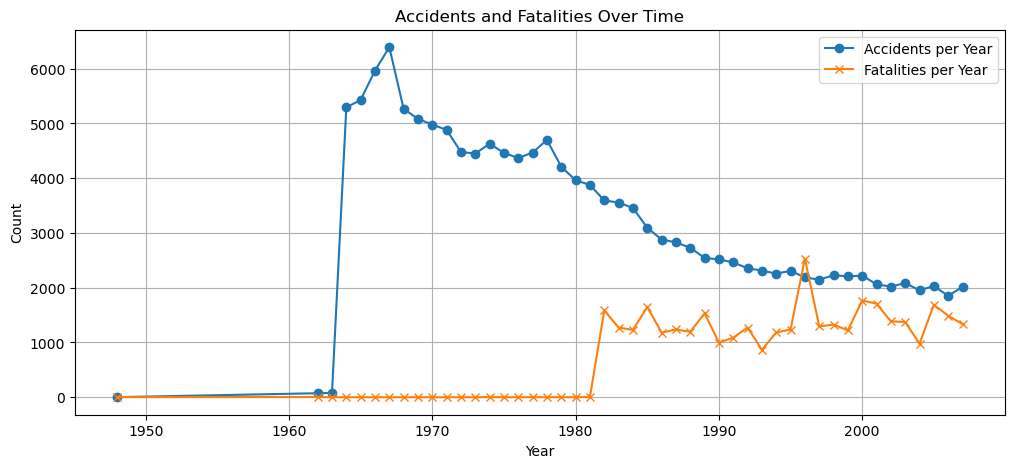

In [32]:
# Convert fatality-related columns to numeric, forcing errors to NaN
numeric_columns = [
    'Total Fatal Injuries', 
    'Total Serious Injuries', 
    'Total Minor Injuries', 
    'Total Uninjured'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Ensure 'Event Date' is datetime
df['Event Date'] = pd.to_datetime(df['Event Date'], errors='coerce')

# Extract year from 'Event Date'
df['Year'] = df['Event Date'].dt.year

# Group by year
accidents_per_year = df.groupby('Year').size()
fatalities_per_year = df.groupby('Year')['Total Fatal Injuries'].sum()

# Plot trends
plt.figure(figsize=(12,5))
plt.plot(accidents_per_year.index, accidents_per_year.values, label='Accidents per Year', marker='o')
plt.plot(fatalities_per_year.index, fatalities_per_year.values, label='Fatalities per Year', marker='x')
plt.title('Accidents and Fatalities Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
